# Lesson 2. Use Raster Data for Earth Data Science

Raster or "gridded" data are stores as a grid of values which are rendered on a map as pixels. Each pixel value represents an area on the Earth's surface making the data "spatial." All of the cells in the grid are the same size.

The raster files we will work with here are spatially referenced, meaning that each pixel represents an area of land on the ground. That area is defined by the spatial `resolution` of the raster.

|![raster_demo](https://www.earthdatascience.org/images/earth-analytics/raster-data/raster-concept.png)| 
|:--:| 
| *Structure of a Raster, i.e. a regular grid of same-sized cells* |

### Raster Data Can Have One or More Layers

Raster data can be composed of one or more layers. For example, a raster file detailing elevation will often have just one layer representing the elevation of the Earth's surface for a particular location. However, other data including images and time series data may result in a raster file with multiple layers.

### There Are Many Different Raster File Formats

Raster data can be stored in a single file. Some datasets such as landsat (a U.S. scientific satellite that studies and photographs the earth's surface by using remote-sensing techniques) and NAIP (National Agriculture Imagery Program) are stored in single files. For landsat, often each band will be stored as a separate \*.tif file. NAIP stores all bands in one \*.tif file though:

* .tif / .tiff: Tagged Image File Format. Common method of storing data, esepcially from Landsat.
* .asc: ASCII Raster Files. Text based format that stores raster data. The format is simple to store and distribute.


Rasters can also be stored in hierarchical data formats. These formats are optimal for larger data sets where we may want to subset or only work with parts of the data at one time. Hierarchical data can be a bit more involved to work with but they tend to make processing more efficient.

* .hdf / .hdf5: Hierarchical Data Format. One of the most common hierarchical ways to store raster data.
* .nc (NetCDF): Network Common Data Form. Common way to store climate data.

### Types of Data Stored in Rasters

Data typically provided in raster format:

* Satellite imagery
* Land use over large areas
* Elevation data
* Weather data
* Bathymetry data

Let's practice by opening and working with some raster data:

In [2]:
import os 

import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import rioxarray as rxr

import earthpy as et
import earthpy.plot as ep

# get the data and set working directory
# et.data.get_data("colorado-flood") # uncomment if you havent downloaded
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))

Extracted output to /Users/giorgio/earth-analytics/data/colorado-flood/.


The data we will work with is lidar (Light Detection and Ranging) derived elevation data representing a Digital Terrain Model (DTM). First create a path to the downloaded file.

In [5]:
# Create a path to file
lidar_dtm_path = os.path.join("colorado-flood",
                              "spatial",
                              "boulder-leehill-rd",
                              "pre-flood",
                              "lidar",
                              "pre_DTM.tif")
lidar_dtm_path

'colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif'

In [6]:
os.getcwd()

'/Users/giorgio/earth-analytics/data'

Notice that we have changed the working directory!

Now let's open the data:

In [7]:
# open and read the DTM, masked=True masks all nodata values
lidar_dtm = rxr.open_rasterio(lidar_dtm_path, masked=True)

lidar_dtm

<xarray.DataArray (band: 1, y: 2000, x: 4000)>
[8000000 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

### Explore Raster Data Values and Structure

Notice that the `type()` of Python object returned by rioxarray is an `xarray DataArray`. This object contains metadata about the array, as well as the data for the array stored in a `numpy` array.

To view the `numpy` array inside of an `xarray DataArray`, access it by using the `.values` accessor at the end of the `rioxarray` variable name.

In [8]:
type(lidar_dtm)

xarray.core.dataarray.DataArray

In [9]:
# View the min and max values of the array
print(lidar_dtm.min(), lidar_dtm.max())

<xarray.DataArray ()>
array(1676.21, dtype=float32)
Coordinates:
    spatial_ref  int64 0 <xarray.DataArray ()>
array(2087.43, dtype=float32)
Coordinates:
    spatial_ref  int64 0


In [10]:
# View the dimensions of the array (rows, columns)
lidar_dtm.shape

(1, 2000, 4000)

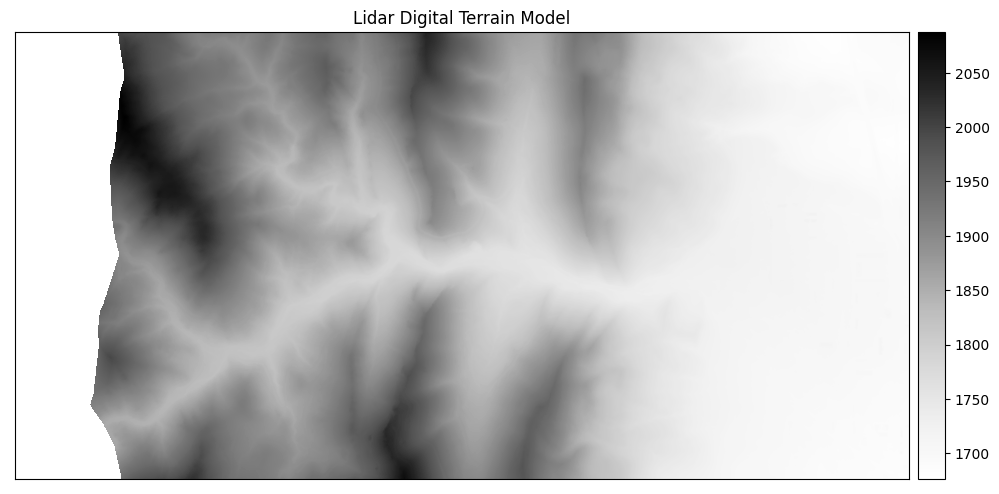

In [11]:
# plot the data
ep.plot_bands(lidar_dtm, 
              scale=False, 
              cmap='Greys', 
              title='Lidar Digital Terrain Model')
plt.show()

## Challenge 1

The colors and numbers on the plot represent the elevation parameter in the raster. Darker colors represent higher elevations while lighter colors represent lower elevations. Since the data represents geography in Colorado, and I know Colorado is a high altitude state already, I assume that the numbers are in meters above sea level.

## Challenge 2

The above lidar DTM that you opened represents a dataset produced before a flood occurred in 2013 in Colorado. A path to a second lidar dataset which is for the same area but from data collected after the flood is below.

In [15]:
lidar_dtm_path_post_flood = os.path.join("colorado-flood", 
                                         "spatial",
                                         "boulder-leehill-rd", 
                                         "post-flood", 
                                         "lidar",
                                         "post_DTM.tif")

lidar_dtm_path_post_flood

'colorado-flood/spatial/boulder-leehill-rd/post-flood/lidar/post_DTM.tif'

1. Use rioxarray to open the data as a numpy array following the code that you used above.

In [16]:
lidar_dtm_post_flood = rxr.open_rasterio(lidar_dtm_path_post_flood, 
                                         masked=True)

lidar_dtm_post_flood

<xarray.DataArray (band: 1, y: 2000, x: 4000)>
[8000000 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

2. View the min and max data values for the output numpy array.

In [17]:
print(lidar_dtm_post_flood.min(), lidar_dtm_post_flood.max())

<xarray.DataArray ()>
array(1675.71, dtype=float32)
Coordinates:
    spatial_ref  int64 0 <xarray.DataArray ()>
array(2111.96, dtype=float32)
Coordinates:
    spatial_ref  int64 0


3. Create a plot of the data.

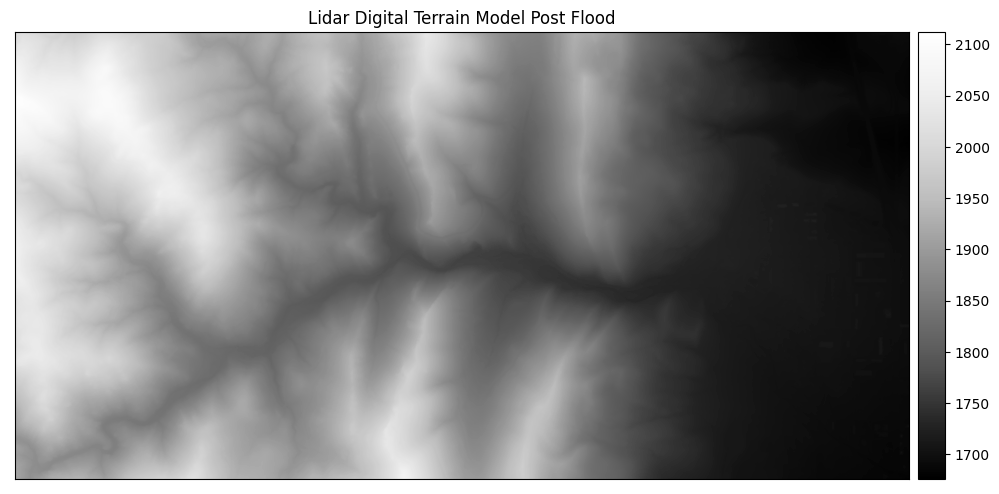

In [28]:
# plot the data
ep.plot_bands(lidar_dtm_post_flood.values, 
              scale=False, 
              cmap='Greys_r', 
              title='Lidar Digital Terrain Model Post Flood')
plt.show()

### Imagery - Another Type of Raster Data

We will download some NAIP data that were collected before a fire that occured close to Nederland, Colorado.

In [29]:
# Download NAIP data
et.data.get_data(url="https://ndownloader.figshare.com/files/23070791")

Extracted output to /Users/giorgio/earth-analytics/data/earthpy-downloads/naip-before-after


'/Users/giorgio/earth-analytics/data/earthpy-downloads/naip-before-after'

In [30]:
# Create a path for the data file - notice it is a .tif file
naip_pre_fire_path = os.path.join("earthpy-downloads",
                                  "naip-before-after",
                                  "pre-fire",
                                  "crop",
                                  "m_3910505_nw_13_1_20150919_crop.tif")

naip_pre_fire_path

'earthpy-downloads/naip-before-after/pre-fire/crop/m_3910505_nw_13_1_20150919_crop.tif'

In [31]:
# open the file
naip_pre_fire = rxr.open_rasterio(naip_pre_fire_path)

naip_pre_fire

<xarray.DataArray (band: 4, y: 2312, x: 4377)>
[40478496 values with dtype=int16]
Coordinates:
  * band         (band) int64 1 2 3 4
  * x            (x) float64 4.572e+05 4.572e+05 ... 4.615e+05 4.615e+05
  * y            (y) float64 4.427e+06 4.427e+06 ... 4.425e+06 4.425e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    STATISTICS_MAXIMUM:  239
    STATISTICS_MEAN:     nan
    STATISTICS_MINIMUM:  32
    STATISTICS_STDDEV:   nan
    _FillValue:          -32768
    scale_factor:        1.0
    add_offset:          0.0

Plotting imagery is different than the DTM we plotted earlier because it is compose of multiple bands. We can plot each band individually using `plot_bands()` or a color image:

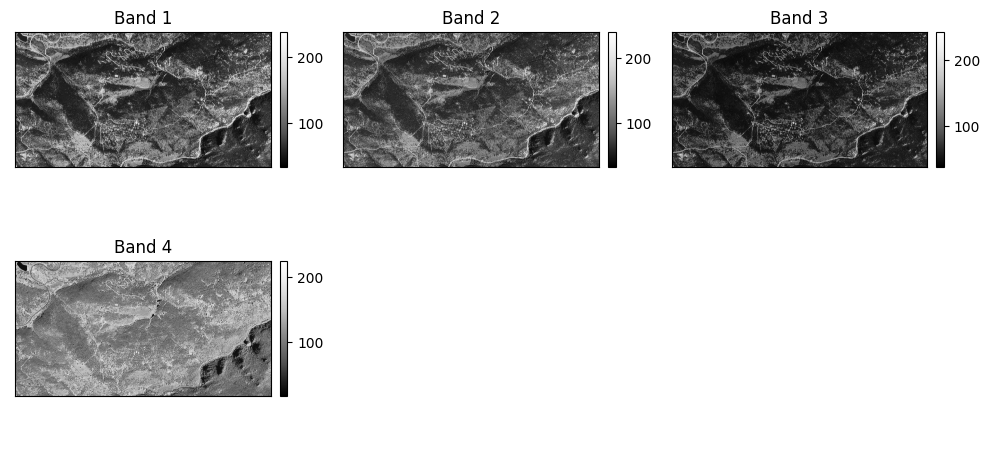

In [32]:
# Plot each layer or band of the image separately
ep.plot_bands(naip_pre_fire, figsize=(10, 5))
plt.show()

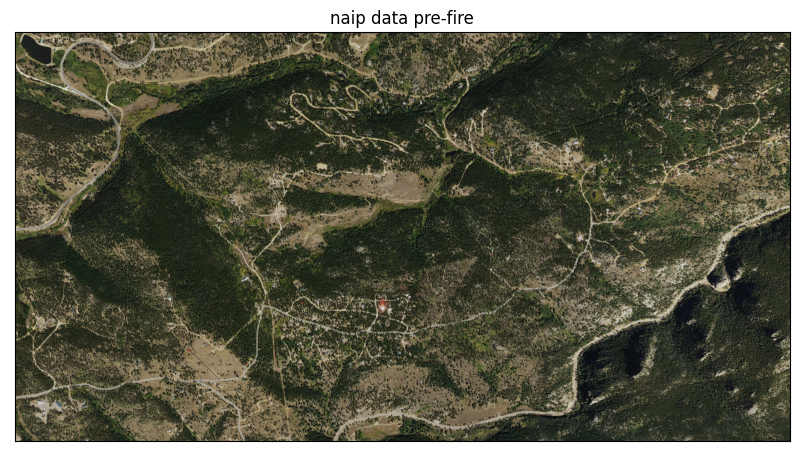

In [33]:
# Plot color image
ep.plot_rgb(naip_pre_fire.values,
            title="naip data pre-fire")
plt.show()

### Challenge: Plot NAIP Imagery Post Fire

Use the path to

1. Open the post fire data.
2. Plot a color version of data using `plot_rgb()`.

In [34]:
# Add the code here to open the raster and read the numpy array inside it
# Create a path for the data file - notice it is a .tif file
naip_post_fire_path = os.path.join("earthpy-downloads",
                                   "naip-before-after",
                                   "post-fire",
                                   "crop",
                                   "m_3910505_nw_13_1_20170902_crop.tif")

# open the file
naip_post_fire = rxr.open_rasterio(naip_post_fire_path)

naip_post_fire

<xarray.DataArray (band: 4, y: 2312, x: 4377)>
[40478496 values with dtype=int16]
Coordinates:
  * band         (band) int64 1 2 3 4
  * x            (x) float64 4.572e+05 4.572e+05 ... 4.615e+05 4.615e+05
  * y            (y) float64 4.427e+06 4.427e+06 ... 4.425e+06 4.425e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    STATISTICS_MAXIMUM:  234
    STATISTICS_MEAN:     63.874147003881
    STATISTICS_MINIMUM:  6
    STATISTICS_STDDEV:   47.250919834769
    _FillValue:          -32768
    scale_factor:        1.0
    add_offset:          0.0

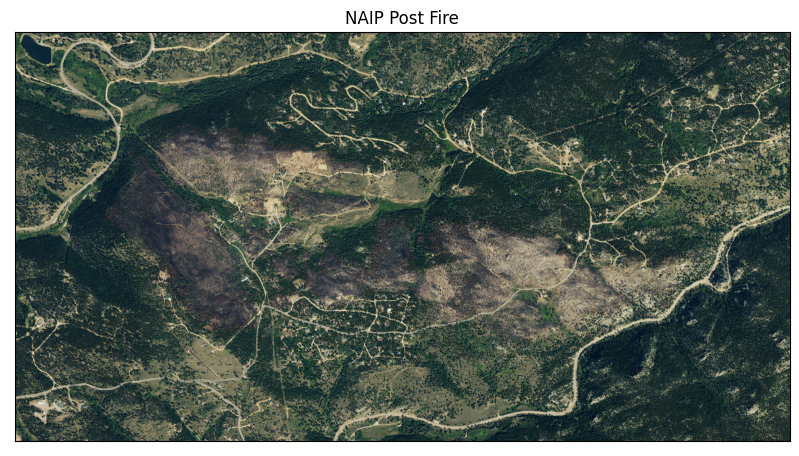

In [35]:
ep.plot_rgb(naip_post_fire.values,
           title='NAIP Post Fire')
plt.show()